# Case Study 1 - Predicting Superconductors 

__Team Members__

- Name 1: Amber Clark
- Name 2: Andrew Leppla
- Name 3: Jorge Olmos
- Name 4: Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
* [Data Evaluation](#data-evaluation)
    - [Data Understanding](#data-understanding)
    - [Missing Values](#missing-values)
    - [Which Values are needed](#values-needed)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Method](#method)
    - [Evaluation Metrics](#evaluation-metrics)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [L1 Model](#L1-model)
    - [L2 Model](#L2-model)
    - [Analysis](#analysis)
* [Model Explanation](#model-explanation)
* [Conclusion](#conclusion)

# Business Understanding <a id='business-understanding'/>



The primary purpose is to research is for the prediction of new superconductors and at the temperature at which they would occur based on the experimental data provided.

We have been provided with two files, once which lists the critical temperature at which the superconductor occurs and the properties associated to the superconductor. A second file maps the materials and breaks down the elements for each of the superconductors. 

Both files contains 21,263 records, with the training file and material files containing 88 variables, and 82 variables respectively. There are no duplicate records, however both the training and materials files contain a duplicate critical_temp column.

Our goal is to create models that predict the __critical temperature__, our target variable, for which a superconductor might occur. To do so we will be creating regression models (Ridge and Lasso), and utilizing different dimensionality reduction techniques to improve training time, avoid overfitting, and take care of multicollinearity. We will be using k-fold cross validation that will help our model have low bias, and evaluating our models using RMSE and an adjusted R^2.




# Data Evaluation <a id='data-evaluation'>
    

In [231]:
# standard libraries
import pandas as pd
import numpy as np
import time
import re #regex

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data pre-processing
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing

# prediction models
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics as mt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from scipy import stats


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Loading Data

In [227]:
materials = pd.read_csv('superconduct/unique_m.csv') 
train = pd.read_csv('superconduct/train.csv')

In [228]:
materials.shape

(21263, 88)

In [229]:
train.shape

(21263, 82)

## Variables
    
| Variable | Type | Description |
|  --- | --- | --- | 
| number_of_elements              | Integer | | |
| mean_atomic_mass                | Float | |
| wtd_mean_atomic_mass            | Float | |
| gmean_atomic_mass               | Float | |
| wtd_gmean_atomic_mass           | Float | |
| entropy_atomic_mass             | Float | |
| wtd_entropy_atomic_mass         | Float | |
| range_atomic_mass               | Float | |
| wtd_range_atomic_mass           | Float | |
| std_atomic_mass                 | Float | |
| wtd_std_atomic_mass             | Float | |
| mean_fie                        | Float | |
| wtd_mean_fie                    | Float | |
| gmean_fie                       | Float | |
| wtd_gmean_fie                   | Float | |
| entropy_fie                     | Float | |
| wtd_entropy_fie                 | Float | |
| range_fie                       | Float | |
| wtd_range_fie                   | Float | |
| std_fie                         | Float | |
| wtd_std_fie                     | Float | |
| mean_atomic_radius              | Float | |
| wtd_mean_atomic_radius          | Float | |
| gmean_atomic_radius             | Float | |
| wtd_gmean_atomic_radius         | Float | |
| entropy_atomic_radius           | Float | |
| wtd_entropy_atomic_radius       | Float | |
| range_atomic_radius             | Integer| |   
| wtd_range_atomic_radius         | Float | |
| std_atomic_radius               | Float | |
| wtd_std_atomic_radius           | Float | |
| mean_Density                    | Float | |
| wtd_mean_Density                | Float | |
| gmean_Density                   | Float | |
| wtd_gmean_Density               | Float | |
| entropy_Density                 | Float | |
| wtd_entropy_Density             | Float | |
| range_Density                   | Float | |
| wtd_range_Density               | Float | |
| std_Density                     | Float | |
| wtd_std_Density                 | Float | |
| mean_ElectronAffinity           | Float | |
| wtd_mean_ElectronAffinity       | Float | |
| gmean_ElectronAffinity          | Float | |
| wtd_gmean_ElectronAffinity      | Float | |
| entropy_ElectronAffinity        | Float | |
| wtd_entropy_ElectronAffinity    | Float | |
| range_ElectronAffinity          | Float | |
| wtd_range_ElectronAffinity      | Float | |
| std_ElectronAffinity            | Float | |
| wtd_std_ElectronAffinity        | Float | |
| mean_FusionHeat                 | Float | |
| wtd_mean_FusionHeat             | Float | |
| gmean_FusionHeat                | Float | |
| wtd_gmean_FusionHeat            | Float | |
| entropy_FusionHeat              | Float | |
| wtd_entropy_FusionHeat          | Float | |
| range_FusionHeat                | Float | |
| wtd_range_FusionHeat            | Float | |
| std_FusionHeat                  | Float | |
| wtd_std_FusionHeat              | Float | |
| mean_ThermalConductivity        | Float | |
| wtd_mean_ThermalConductivity    | Float | |
| gmean_ThermalConductivity       | Float | |
| wtd_gmean_ThermalConductivity   | Float | |
| entropy_ThermalConductivity     | Float | |
| wtd_entropy_ThermalConductivity | Float | |
| range_ThermalConductivity       | Float | |
| wtd_range_ThermalConductivity   | Float | |
| std_ThermalConductivity         | Float | |
| wtd_std_ThermalConductivity     | Float | |
| mean_Valence                    | Float | |
| wtd_mean_Valence                | Float | |
| gmean_Valence                   | Float | |
| wtd_gmean_Valence               | Float | |
| entropy_Valence                 | Float | |
| wtd_entropy_Valence             | Float | |
| range_Valence                   | Integer | |   
| wtd_range_Valence               | Float | |
| std_Valence                     | Float | |
| wtd_std_Valence                 | Float | |
| critical_temp                   | Float  ||
| material                        | Categorial | | 

## Missing Data

We looked at both the materials datasets and the train dataset and there appears to not be any missing values

There's no missing data in this dataset

In [130]:
materials.isnull().values.any()

False

In [129]:
train.isnull().values.any()

False

## Exploring Correlations of Feature vs Target Variable 


We wanted to examine the relationship between feature variables and the target variable to see if wee needed to have polinomial features added. There might be a non linear relationship between, wtd_range_atomic_mass mean_density, wtd_mean_desity, gmean_density, wtd_gmean_density, wtd_range_density, mean_fusion_heat,  wtd_mean_fusionheat, mean_Valence, wtd_mean_valence, gmean_valend, wtd_gmean_valance

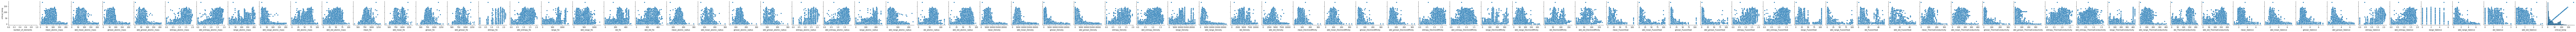

In [195]:
sns.pairplot(train, y_vars='critical_temp', x_vars=train.columns.values);


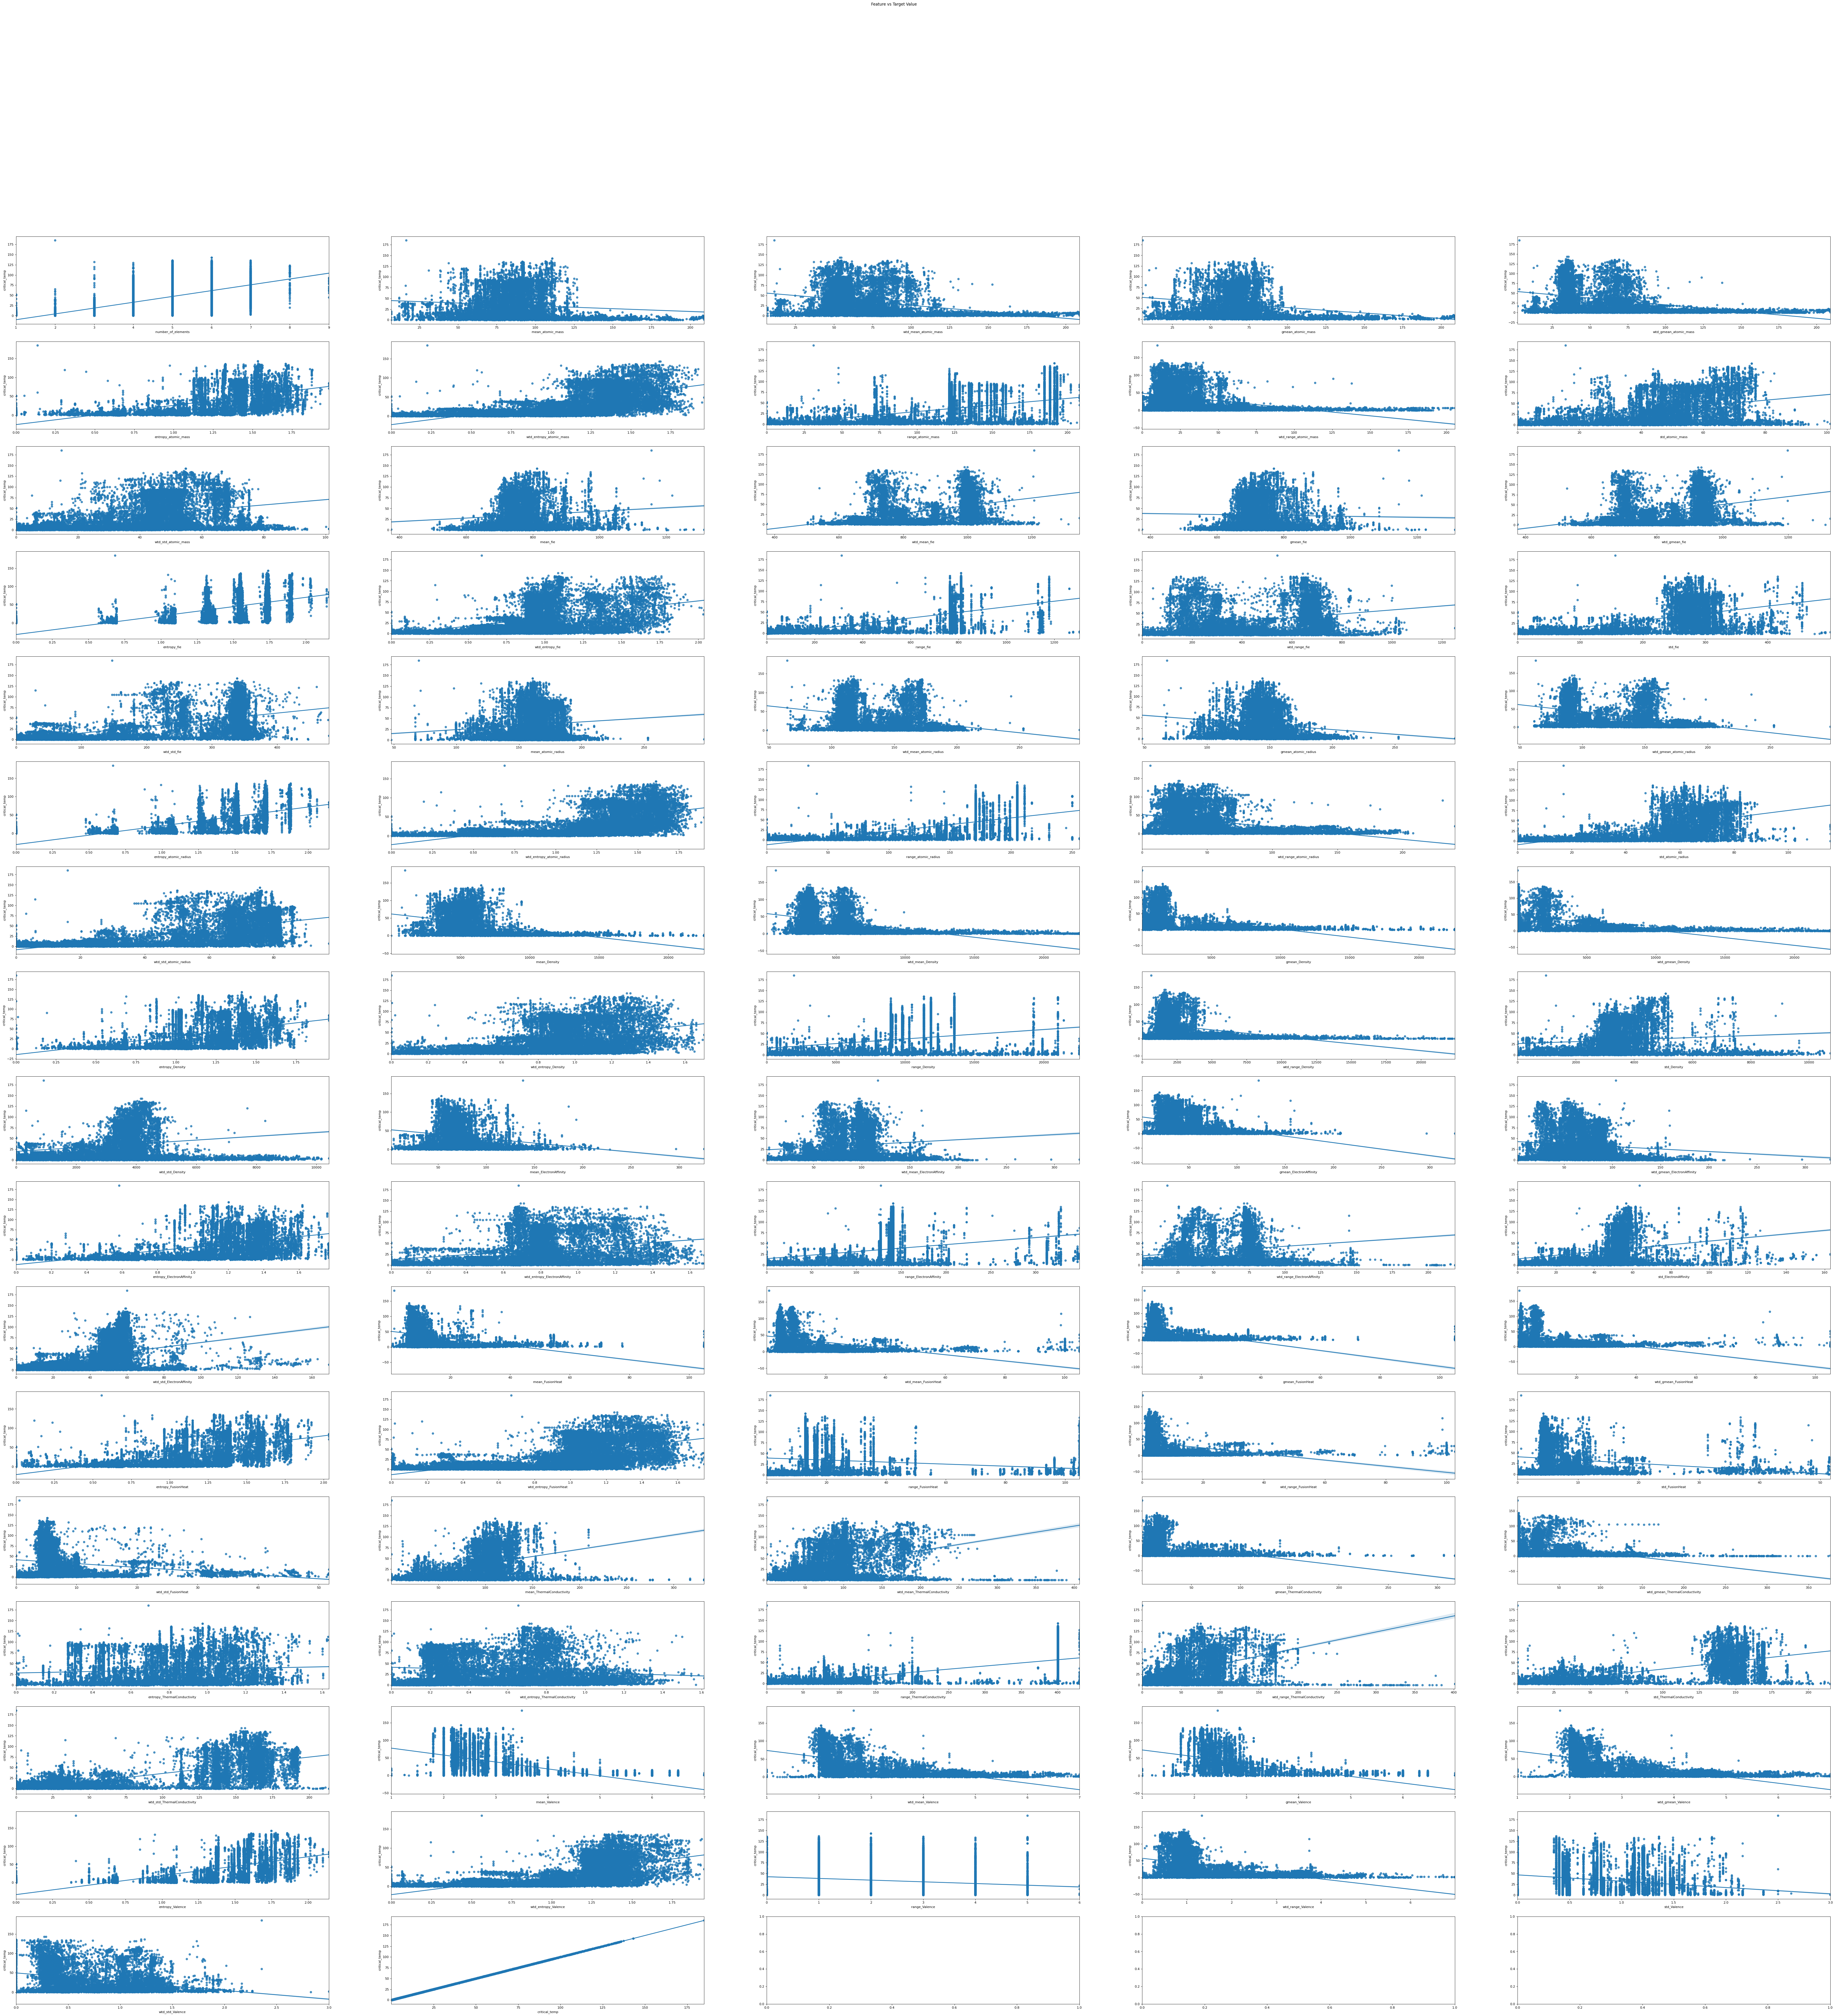

In [194]:
import seaborn as sns
#sns.pairplot(train, y_vars='critical_temp', x_vars=train.columns.values);

fig, axes = plt.subplots(17, 5, figsize=(100, 100), dpi=80)
fig.suptitle('Feature vs Target Value')

for col in train.columns:
    idx = train.columns.get_loc(col)
    sns.regplot(ax=axes[int(idx/5), idx%5],x=col, y='critical_temp', data=train);


## Determining Outliers

In [275]:
z_scores = stats.zscore(train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = train[filtered_entries]


In [276]:
new_df.shape

(19402, 82)

In [277]:
new_df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

## Merging Data Sets

Should we remove columns? We might need it for predictions? 
##mention somewhere that there are noble gases

In [123]:
stats = materials.describe()
drops = [c for c in stats.columns if stats[c]['max'] == 0.0]
print("Columns With All 0s ", drops)

Columns With All 0s  ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


In [124]:
#cleanup files before combining
#drop critical temp (duplicated in df_t) and material (unneeded) from element set
materials = materials.drop(['critical_temp', 'material'], axis = 1)

In [145]:
df = pd.concat([materials, train ], axis=1)
df.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...  wtd_mean_Valence  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.257143   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.257143   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.271429   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.264286   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.242857   

   gmean_Valence  wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  \
0       2.213364           2.219783         1.368922             1.066221   
1       1.888175           2.210679         1.557113             1.047221   
2       2.213364           2.232679         1.368922             1.029175   
3       2.213364           2.226222         1.368922             1.048834   
4       2.213364           2.206963         1.368922             1.096052   

   range_Valence  wtd_range_Valence  std_Valence  wtd_std_Valence  \
0              1           1.085714     0.433013         0.437059   
1              2           1.128571     0.632456         0.468606   
2              1           1.114286     0.433013         0.444697   
3              1           1.100000     0.433013         0.440952   
4              1           1.057143     0.433013         0.428809   

   critical_temp  
0           29.0  
1           26.0  
2           19.0  
3           22.0  
4           23.0  

[5 rows x 168 columns]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
intx = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

model_terms = list(model_factors['Factor'])

X_intx_train = pd.DataFrame( intx.fit_transform(X_train_scaled[model_terms]) )
X_intx_test = pd.DataFrame( intx.fit_transform(X_test_scaled[model_terms]) )

## Examining Distribution of Target Variable: Critical Temperature

### Distribution of critical temperature 

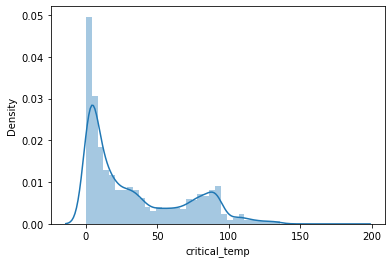

In [79]:
sns.distplot(materials['critical_temp']);


### Distribution of log of critical temperature

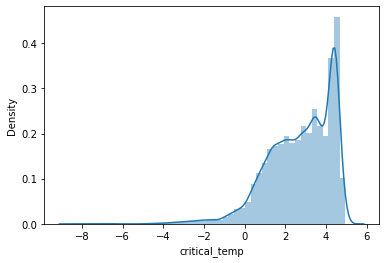

In [80]:
sns.distplot(np.log(materials['critical_temp']));

### Distribution of sqrt of critical temperature

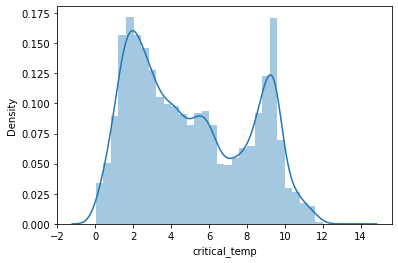

In [81]:
sns.distplot(np.sqrt(materials['critical_temp']));

### Boxcox distribution of critical temperature

Tries different lambdas to get the most normal distribution for this dataset, as long as the target variable, in this case the critical temperature in kelving, is not negative. Additionally you can also inverse boxcox to retrive original value

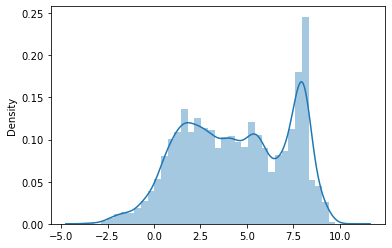

In [85]:
sns.distplot(stats.boxcox(materials['critical_temp'])[0]);

## Scaling Data

In [146]:
# Define y and X
y = np.array( df['critical_temp'] )
df.drop(['critical_temp'], axis=1, inplace=True)
X = df

In [147]:
X

H  He   Li   Be    B    C    N     O    F  Ne  ...  mean_Valence  \
0      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...          2.25   
1      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...          2.00   
2      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...          2.25   
3      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...          2.25   
4      0.0   0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   0  ...          2.25   
...    ...  ..  ...  ...  ...  ...  ...   ...  ...  ..  ...           ...   
21258  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...          3.25   
21259  0.0   0  0.0  0.0  0.0  0.0  0.0  11.0  0.0   0  ...          2.20   
21260  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...          4.50   
21261  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...          4.50   
21262  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0  ...          5.00   

       wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  entropy_Valence  \
0              2.257143       2.213364           2.219783         1.368922   
1              2.257143       1.888175           2.210679         1.557113   
2              2.271429       2.213364           2.232679         1.368922   
3              2.264286       2.213364           2.226222         1.368922   
4              2.242857       2.213364           2.206963         1.368922   
...                 ...            ...                ...              ...   
21258          3.555556       3.223710           3.519911         1.377820   
21259          2.047619       2.168944           2.038991         1.594167   
21260          4.800000       4.472136           4.781762         0.686962   
21261          4.690000       4.472136           4.665819         0.686962   
21262          4.500000       4.762203           4.242641         1.054920   

       wtd_entropy_Valence  range_Valence  wtd_range_Valence  std_Valence  \
0                 1.066221              1           1.085714     0.433013   
1                 1.047221              2           1.128571     0.632456   
2                 1.029175              1           1.114286     0.433013   
3                 1.048834              1           1.100000     0.433013   
4                 1.096052              1           1.057143     0.433013   
...                    ...            ...                ...          ...   
21258             0.913658              1           2.168889     0.433013   
21259             1.337246              1           0.904762     0.400000   
21260             0.450561              1           3.200000     0.500000   
21261             0.577601              1           2.210000     0.500000   
21262             0.970116              3           1.800000     1.414214   

       wtd_std_Valence  
0             0.437059  
1             0.468606  
2             0.444697  
3             0.440952  
4             0.428809  
...                ...  
21258         0.496904  
21259         0.212959  
21260         0.400000  
21261         0.462493  
21262         1.500000  

[21263 rows x 167 columns]

In [148]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234321) 

# Center and Scale X
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train) # apply to training
X_test_scaled = scl.transform(X_test) # apply to the test set (without snooping)

## Feature Selection

In [211]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=100)
#lasso = Lasso(random_state=0, max_iter=10000, tol=1e-2)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668262.6509860302, tolerance: 1412.9166226024897
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1671409.829856009, tolerance: 1408.332593508793
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1683443.7556735894, tolerance: 1417.4724446365278
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1653258.9817764934, tolerance: 1396.9322223711583
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1708596.4632068658, tolerance: 1392.5322906443953
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1670057.7019506176, tolerance: 1412.9166226024897
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1678647.353785777, tolerance: 1408.332593508793
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1691047.6663242544, tolerance: 1417.4724446365278
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1659301.7296774576, tolerance: 1396.9322223711583
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1733942.5991536498, tolerance: 1392.5322906443953
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1706958.5339435393, tolerance: 1412.9166226024897
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705411.215044447, tolerance: 1408.332593508793
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774395.5781820721, tolerance: 1417.4724446365278
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738064.8357688836, tolerance: 1396.9322223711583
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1794287.3079563037, tolerance: 1392.5322906443953
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1892533.4723743293, tolerance: 1408.332593508793
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1906020.2041687693, tolerance: 1417.4724446365278
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861789.456027351, tolerance: 1396.9322223711583
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWa

GridSearchCV(cv=5, estimator=Lasso(max_iter=100, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}])

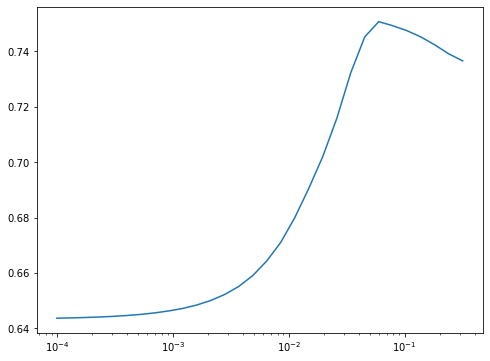

In [212]:
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6);
plt.semilogx(alphas, scores);


(0.0001, 0.31622776601683794)

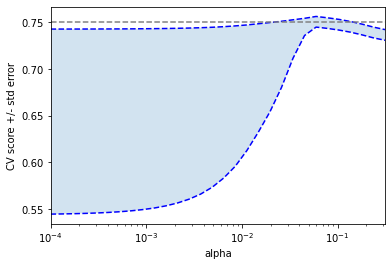

In [213]:
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

### Best Alpha 

In [214]:
clf.best_params_


{'alpha': 0.05968456995122311}

## Best parameters

In [218]:
coefficients = clf.best_estimator_.coef_


In [220]:
importance = np.abs(coefficients)
importance

array([0.00000000e+00, 0.00000000e+00, 1.00611811e+00, 5.88926068e-02,
       2.31250664e-01, 1.47679014e-01, 0.00000000e+00, 4.31863458e-02,
       2.83850898e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.62631949e-01, 1.31861972e+00, 8.08387476e-01, 1.45602490e+00,
       3.26769442e+00, 0.00000000e+00, 0.00000000e+00, 2.03699313e+00,
       0.00000000e+00, 1.02292294e-01, 6.69619444e-02, 0.00000000e+00,
       0.00000000e+00, 5.83050824e-01, 4.01466131e-01, 2.98619234e-01,
       4.08078005e-01, 0.00000000e+00, 2.50189219e-01, 9.90412943e-01,
       1.53480962e+00, 7.62595017e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.96899893e-01, 0.00000000e+00, 5.12273391e-03,
       9.55870119e-02, 1.14670904e-02, 0.00000000e+00, 0.00000000e+00,
       9.10429362e-03, 1.18031801e-01, 7.13994523e+00, 1.80199894e-02,
       4.06868990e-01, 7.01597946e-02, 2.13138610e-02, 9.59106991e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.96980904e+00,
      

In [221]:
np.array(X_train.columns.values)[importance > 0]

array(['Li', 'Be', 'B', 'C', 'O', 'F', 'Al', 'Si', 'P', 'S', 'Cl', 'Ca',
       'Ti', 'V', 'Fe', 'Co', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se', 'Sr',
       'Zr', 'Nb', 'Mo', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te',
       'Ba', 'La', 'Pr', 'Nd', 'Eu', 'Gd', 'Yb', 'Lu', 'Re', 'Os', 'Pt',
       'Hg', 'Tl', 'Pb', 'Bi', 'number_of_elements', 'mean_atomic_mass',
       'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'range_atomic_mass',
       'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius',
       'gmean_atomic_radius', 'wtd_gmean_atomic_radius',
       'range_atomic_radius', 'wtd_range_atomic_radius',
       'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density',
       'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density',
       'range_Density', 'w

In [223]:
len(np.array(X_train.columns.values)[importance > 0])

114

## Variable Correlations with Critical Temp

In [88]:
print(train[train.columns[1:]].corr()['critical_temp'][:-1].sort_values())

wtd_mean_Valence              -0.632401
wtd_gmean_Valence             -0.615653
mean_Valence                  -0.600085
gmean_Valence                 -0.573068
gmean_Density                 -0.541684
                                 ...   
wtd_entropy_atomic_mass        0.626930
std_ThermalConductivity        0.653632
range_atomic_radius            0.653759
range_ThermalConductivity      0.687654
wtd_std_ThermalConductivity    0.721271
Name: critical_temp, Length: 80, dtype: float64


In [112]:
outliers = pd.DataFrame()
for col in train.columns:
    col_zscore = col + "_zscore"
    outliers[col_zscore] = (train[col] - train[col].mean())/train[col].std(ddof=0)
outliers.head()

number_of_elements_zscore  mean_atomic_mass_zscore  \
0                  -0.080058                 0.046733   
1                   0.614744                 0.174269   
2                  -0.080058                 0.046733   
3                  -0.080058                 0.046733   
4                  -0.080058                 0.046733   

   wtd_mean_atomic_mass_zscore  gmean_atomic_mass_zscore  \
0                    -0.451651                 -0.158850   
1                    -0.432071                  0.059368   
2                    -0.450978                 -0.158850   
3                    -0.451314                 -0.158850   
4                    -0.452324                 -0.158850   

   wtd_gmean_atomic_mass_zscore  entropy_atomic_mass_zscore  \
0                     -0.611819                    0.044358   
1                     -0.604180                    0.777430   
2                     -0.611658                    0.044358   
3                     -0.611739                    0.044358   
4                     -0.611980                    0.044358   

   wtd_entropy_atomic_mass_zscore  range_atomic_mass_zscore  \
0                       -0.003707                  0.133725   
1                       -0.015267                  0.133725   
2                       -0.218984                  0.133725   
3                       -0.103615                  0.133725   
4                        0.162775                  0.133725   

   wtd_range_atomic_mass_zscore  std_atomic_mass_zscore  ...  \
0                     -0.053039                0.378186  ...   
1                      0.108900                0.134901  ...   
2                      0.093294                0.378186  ...   
3                      0.020128                0.378186  ...   
4                     -0.199372                0.378186  ...   

   wtd_mean_Valence_zscore  gmean_Valence_zscore  wtd_gmean_Valence_zscore  \
0                -0.752156             -0.805912                 -0.711705   
1                -0.752156             -1.116731                 -0.719454   
2                -0.740164             -0.805912                 -0.700728   
3                -0.746160             -0.805912                 -0.706224   
4                -0.764149             -0.805912                 -0.722618   

   entropy_Valence_zscore  wtd_entropy_Valence_zscore  range_Valence_zscore  \
0                0.186292                    0.035183             -0.837959   
1                0.664971                   -0.014779             -0.033011   
2                0.186292                   -0.062235             -0.837959   
3                0.186292                   -0.010538             -0.837959   
4                0.186292                    0.113627             -0.837959   

   wtd_range_Valence_zscore  std_Valence_zscore  wtd_std_Valence_zscore  \
0                 -0.406166           -0.838372               -0.520070   
1                 -0.362352           -0.426866               -0.450821   
2                 -0.376957           -0.838372               -0.503304   
3                 -0.391562           -0.838372               -0.511524   
4                 -0.435376           -0.838372               -0.538178   

   critical_temp_zscore  
0             -0.158267  
1             -0.245849  
2             -0.450208  
3             -0.362626  
4             -0.333432  

[5 rows x 82 columns]

In [99]:
outliers.shape

(21263, 82)

In [232]:
z_scores = stats.zscore(train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = train[filtered_entries]


In [233]:
new_df.shape

(19402, 82)

In [234]:
train.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

# Model Preparations <a id='model-preparations'>

# Model Building & Evaluations <a id='#model-building'>

# Model Explanation <a id='model-explanation'>

# Conclusion <a id='conclusion'>